In [365]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [366]:
from google.colab import drive

In [367]:
df = pd.read_excel('/content/drive/MyDrive/Clustering Clean Ads_Data-2.xlsx')

**Problem Statement:**

**Clustering:**

**Digital Ads Data:**

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

The following three features are commonly used in digital marketing:

**CPM = (Total Campaign Spend / Number of Impressions) * 1,000**. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset.

**CPC = Total Cost (spend) / Number of Clicks**.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset.

**CTR = Total Measured Clicks / Total Measured Ad Impressions x 100**. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset.

## **Part 1 - Clustering: Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.**

In [368]:
df.shape

(23066, 19)

In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [370]:
df.drop(columns=['Timestamp', 'InventoryType', 'Ad Type', 'Platform','Device Type', 'Format'], inplace=True)

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ad - Length            23066 non-null  int64  
 1   Ad- Width              23066 non-null  int64  
 2   Ad Size                23066 non-null  int64  
 3   Available_Impressions  23066 non-null  int64  
 4   Matched_Queries        23066 non-null  int64  
 5   Impressions            23066 non-null  int64  
 6   Clicks                 23066 non-null  int64  
 7   Spend                  23066 non-null  float64
 8   Fee                    23066 non-null  float64
 9   Revenue                23066 non-null  float64
 10  CTR                    18330 non-null  float64
 11  CPM                    18330 non-null  float64
 12  CPC                    18330 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 2.3 MB


In [372]:
df.head(10)

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.00,0.35,0.0,0.0031,0.00,0.00
1,300,250,75000,1780,285,285,1,0.00,0.35,0.0,0.0035,0.00,0.00
2,300,250,75000,2727,356,355,1,0.00,0.35,0.0,0.0028,0.00,0.00
3,300,250,75000,2430,497,495,1,0.00,0.35,0.0,0.0020,0.00,0.00
4,300,250,75000,1218,242,242,1,0.00,0.35,0.0,0.0041,0.00,0.00
5,300,250,75000,490,64,64,2,0.00,0.35,0.0,0.0313,0.01,0.00
6,300,250,75000,1197,202,202,1,0.01,0.35,0.0,0.0050,0.03,0.01
7,300,250,75000,1363,198,196,1,0.00,0.35,0.0,0.0051,0.00,0.00
8,300,250,75000,1402,137,136,1,0.00,0.35,0.0,0.0074,0.02,0.00
9,300,250,75000,1816,312,311,1,0.00,0.35,0.0,0.0032,0.00,0.00


In [373]:
df.tail(10)

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23056,120,600,72000,2,2,2,1,0.10,0.35,0.0650,NaN,NaN,NaN
23057,120,600,72000,5,2,2,1,0.07,0.35,0.0455,NaN,NaN,NaN
23058,720,300,216000,1,1,1,1,0.08,0.35,0.0520,NaN,NaN,NaN
23059,720,300,216000,2,2,2,1,0.07,0.35,0.0455,NaN,NaN,NaN
23060,120,600,72000,4,4,4,1,0.14,0.35,0.0910,NaN,NaN,NaN
23061,720,300,216000,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,720,300,216000,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,720,300,216000,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,120,600,72000,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,720,300,216000,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [374]:
df.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,23066.000000,23066.000000,23066.000000,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,23066.000000,23066.000000,23066.000000,18330.000000,18330.000000,18330.000000
mean,385.163097,337.896037,96674.468048,2.432044e+06,1.295099e+06,1.241520e+06,10678.518816,2706.625689,0.335123,1924.252331,0.073661,7.672045,0.351061
std,233.651434,203.092885,61538.329557,4.742888e+06,2.512970e+06,2.429400e+06,17353.409363,4067.927273,0.031963,3105.238410,0.075160,6.481391,0.343334
min,120.000000,70.000000,33600.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.210000,0.000000,0.000100,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,3.367225e+04,1.828250e+04,7.990500e+03,710.000000,85.180000,0.330000,55.365375,0.002600,1.710000,0.090000
50%,300.000000,300.000000,72000.000000,4.837710e+05,2.580875e+05,2.252900e+05,4425.000000,1425.125000,0.350000,926.335000,0.082550,7.660000,0.160000
75%,720.000000,600.000000,84000.000000,2.527712e+06,1.180700e+06,1.112428e+06,12793.750000,3121.400000,0.350000,2091.338150,0.130000,12.510000,0.570000
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,1.000000,81.560000,7.260000


In [375]:
df.isnull().sum()

Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [376]:
df.duplicated().sum()

16

In [377]:
df.drop_duplicates(inplace=True)

In [378]:
df.duplicated().sum()

0

In [379]:
df.shape

(23050, 13)

In [380]:
df.nunique()

Ad - Length                  6
Ad- Width                    5
Ad Size                      7
Available_Impressions    21560
Matched_Queries          20919
Impressions              20405
Clicks                   12752
Spend                    20467
Fee                          7
Revenue                  20578
CTR                       2066
CPM                       2084
CPC                        194
dtype: int64

In [381]:
from sklearn.preprocessing import StandardScaler

In [382]:
numeric_features = ['Available_Impressions','Matched_Queries','Impressions','Clicks','Spend','Fee','Revenue','CTR','CPM','CPC']

In [383]:
numeric_data = df[numeric_features]

In [384]:
scaler = StandardScaler()

In [385]:
normalized_data = scaler.fit_transform(numeric_data)

In [386]:
normalized_df = pd.DataFrame(normalized_data, columns=numeric_features)

In [387]:
normalized_df

,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.512632,-0.515474,-0.511141,-0.615606,-0.665705,0.465644,-0.619991,-0.938831,-1.183736,-1.022533
1,-0.512638,-0.515490,-0.511157,-0.615606,-0.665705,0.465644,-0.619991,-0.933509,-1.183736,-1.022533
2,-0.512438,-0.515462,-0.511128,-0.615606,-0.665705,0.465644,-0.619991,-0.942823,-1.183736,-1.022533
3,-0.512501,-0.515406,-0.511071,-0.615606,-0.665705,0.465644,-0.619991,-0.953467,-1.183736,-1.022533
4,-0.512756,-0.515507,-0.511175,-0.615606,-0.665705,0.465644,-0.619991,-0.925526,-1.183736,-1.022533
...,...,...,...,...,...,...,...,...,...,...
23045,-0.513012,-0.515602,-0.511273,-0.615606,-0.665671,0.465644,-0.619961,NaN,NaN,NaN
23046,-0.513013,-0.515603,-0.511274,-0.615606,-0.665688,0.465644,-0.619976,NaN,NaN,NaN
23047,-0.513012,-0.515603,-0.511274,-0.615606,-0.665693,0.465644,-0.619980,NaN,NaN,NaN
23048,-0.513011,-0.515603,-0.511274,-0.615606,-0.665688,0.465644,-0.619976,NaN,NaN,NaN


In [388]:
df.corr()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
Ad - Length,1.000000,-0.705661,0.541604,0.301585,0.295695,0.293747,-0.005252,0.249095,-0.138829,0.248432,-0.262658,-0.311500,0.252932
Ad- Width,-0.705661,1.000000,0.110717,-0.410584,-0.397869,-0.398459,0.157876,-0.274268,0.147318,-0.265019,0.685946,0.706213,-0.530765
Ad Size,0.541604,0.110717,1.000000,-0.203483,-0.196707,-0.197086,0.117584,-0.144283,0.169354,-0.143927,0.363157,0.307514,-0.324229
Available_Impressions,0.301585,-0.410584,-0.203483,1.000000,0.994912,0.994816,0.105844,0.891924,-0.814716,0.896323,-0.462282,-0.456052,0.552704
Matched_Queries,0.295695,-0.397869,-0.196707,0.994912,1.000000,0.999922,0.118882,0.904693,-0.832645,0.908205,-0.457880,-0.448884,0.569770
Impressions,0.293747,-0.398459,-0.197086,0.994816,0.999922,1.000000,0.111390,0.901376,-0.828787,0.904847,-0.460406,-0.451760,0.571799
Clicks,-0.005252,0.157876,0.117584,0.105844,0.118882,0.111390,1.000000,0.481512,-0.534907,0.464990,0.218089,0.244377,-0.183631
Spend,0.249095,-0.274268,-0.144283,0.891924,0.904693,0.901376,0.481512,1.000000,-0.958941,0.998766,-0.309609,-0.264654,0.465436
Fee,-0.138829,0.147318,0.169354,-0.814716,-0.832645,-0.828787,-0.534907,-0.958941,1.000000,-0.960154,0.215053,0.167742,-0.391117
Revenue,0.248432,-0.265019,-0.143927,0.896323,0.908205,0.904847,0.464990,0.998766,-0.960154,1.000000,-0.296897,-0.254227,0.455262


## **Part 1 - Clustering: Treat missing values in CPC, CTR and CPM using the formula given.**

Fill missing values in 'Clicks' and 'Impressions' with zeros. This is because if these values are missing, it implies that no clicks or impressions occurred.

Calculate the missing 'CTR', 'CPM', and 'CPC' values based on the formula using the non-missing 'Clicks', 'Impressions', and 'Spend' values.

In [389]:
df['Clicks'] = df['Clicks'].fillna(0)
df['Impressions'] = df['Impressions'].fillna(0)
df['Spend'] = df['Spend'].fillna(0)



In [390]:
df['CTR'] = df['Clicks'] / df['Impressions']
df['CPM'] = df['Spend'] / (df['Impressions']/1000)
df['CPC'] = df['Spend'] / df['Clicks']

In [391]:
df.isnull().sum()

Ad - Length              0
Ad- Width                0
Ad Size                  0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

**With these steps, the missing values in 'Clicks', 'Impressions', and 'Spend' are filled with zeros, and 'CTR', 'CPM', and 'CPC' are calculated using the given formulas.**

## **Part 1 - Clustering: Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).**

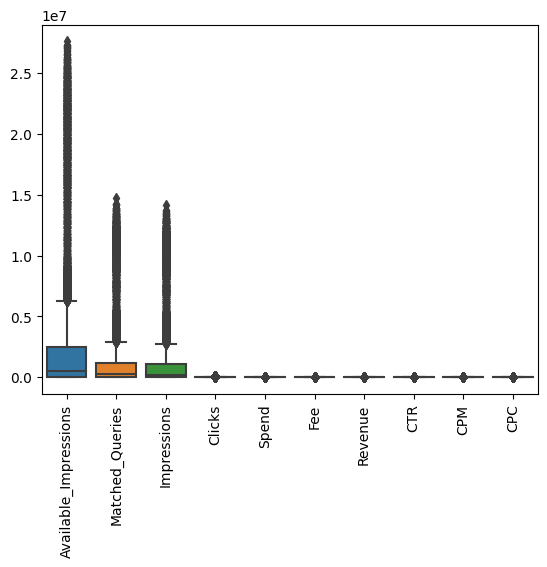

In [392]:
sns.boxplot(data=df[numeric_features])
plt.xticks(rotation=90)
plt.show()

In [393]:
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)

# Count the number of outliers
print("Number of outliers:", outliers.sum())

Number of outliers: 5739


In [394]:
outlier_rows = df[outliers]

In [395]:
print(outlier_rows)

       Ad - Length  Ad- Width  Ad Size  Available_Impressions  \
160            720        300   216000                      5   
184            120        600    72000                    112   
185            120        600    72000                     33   
204            120        600    72000                      4   
212            120        600    72000                     87   
...            ...        ...      ...                    ...   
23060          120        600    72000                      4   
23061          720        300   216000                      1   
23063          720        300   216000                      2   
23064          120        600    72000                      7   
23065          720        300   216000                      2   

       Matched_Queries  Impressions  Clicks  Spend   Fee  Revenue       CTR  \
160                  3            2       1   0.07  0.35   0.0500  0.500000   
184                 14           12       4   0.13  0.35   0.

In [396]:
from scipy.stats import zscore
df_imputed = df.copy()
df_imputed[numeric_features] = np.where(outliers[:, None], zscore(df[numeric_features]), df[numeric_features])
print(df_imputed[numeric_features])

       Available_Impressions  Matched_Queries  Impressions    Clicks  \
0                1806.000000       325.000000   323.000000  1.000000   
1                1780.000000       285.000000   285.000000  1.000000   
2                2727.000000       356.000000   355.000000  1.000000   
3                2430.000000       497.000000   495.000000  1.000000   
4                1218.000000       242.000000   242.000000  1.000000   
...                      ...              ...          ...       ...   
23060              -0.513012        -0.515602    -0.511273 -0.615606   
23061              -0.513013        -0.515603    -0.511274 -0.615606   
23063              -0.513012        -0.515603    -0.511274 -0.615606   
23064              -0.513011        -0.515603    -0.511274 -0.615606   
23065              -0.513012        -0.515603    -0.511274 -0.615606   

          Spend       Fee   Revenue       CTR       CPM       CPC  
0      0.000000  0.350000  0.000000  0.003096  0.000000  0.000000  

<ipython-input-396-658179f6e4c0>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_imputed[numeric_features] = np.where(outliers[:, None], zscore(df[numeric_features]), df[numeric_features])


In [397]:
scaler = StandardScaler()


df_standardized = df.copy()
df_standardized[numeric_features] = scaler.fit_transform(df[numeric_features])

In [398]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_normalized = df.copy()
df_normalized[numeric_features] = scaler.fit_transform(df[numeric_features])

In [399]:
df_normalized

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,6.541547e-05,2.203778e-05,2.268441e-05,0.0,0.000000,1.0,0.000000,0.001494,0.000000,0.000000
1,300,250,75000,6.447320e-05,1.931707e-05,2.000736e-05,0.0,0.000000,1.0,0.000000,0.001700,0.000000,0.000000
2,300,250,75000,9.879367e-05,2.414634e-05,2.493876e-05,0.0,0.000000,1.0,0.000000,0.001354,0.000000,0.000000
3,300,250,75000,8.803002e-05,3.373685e-05,3.480154e-05,0.0,0.000000,1.0,0.000000,0.000956,0.000000,0.000000
4,300,250,75000,4.410561e-05,1.639230e-05,1.697808e-05,0.0,0.000000,1.0,0.000000,0.002012,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23060,120,600,72000,1.087238e-07,2.040535e-07,2.113454e-07,0.0,0.000005,1.0,0.000004,0.124952,0.048951,0.019273
23061,720,300,216000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000003,1.0,0.000002,0.499973,0.097902,0.009637
23063,720,300,216000,3.624126e-08,0.000000e+00,0.000000e+00,0.0,0.000002,1.0,0.000002,0.499973,0.069930,0.006883
23064,120,600,72000,2.174476e-07,0.000000e+00,0.000000e+00,0.0,0.000003,1.0,0.000002,0.499973,0.097902,0.009637


**To treat outliers for K-Means clustering depends on the specific characteristics of the data and the goals of the analysis. If the outliers are genuine and meaningful data points, it might be better to keep them and carefully interpret the clustering results. On the other hand, if the outliers are likely to distort the clustering process or lead to unreliable results, applying outlier treatment techniques like scaling, transformation, can be beneficial. Ultimately, the decision to treat outliers should be made based on a thoughtful analysis of the dataset and the context of the problem being addressed.**

# **Part 1 - Clustering: Perform z-score scaling and discuss how it affects the speed of the algorithm.**

In [400]:
from sklearn.preprocessing import StandardScaler

In [401]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_imputed[numeric_features])

In [402]:
df_scaled= pd.DataFrame(scaled_data, columns= numeric_features)
print(df_scaled.head())

   Available_Impressions  Matched_Queries  Impressions    Clicks     Spend  \
0              -0.565615        -0.574321    -0.559680 -0.625053 -0.768479   
1              -0.565639        -0.574395    -0.559752 -0.625053 -0.768479   
2              -0.564792        -0.574264    -0.559619 -0.625053 -0.768479   
3              -0.565057        -0.574004    -0.559354 -0.625053 -0.768479   
4              -0.566141        -0.574475    -0.559834 -0.625053 -0.768479   

        Fee   Revenue       CTR       CPM       CPC  
0  0.426119 -0.763131 -0.027363 -0.956598 -0.509236  
1  0.426119 -0.763131 -0.026750 -0.956598 -0.509236  
2  0.426119 -0.763131 -0.027778 -0.956598 -0.509236  
3  0.426119 -0.763131 -0.028961 -0.956598 -0.509236  
4  0.426119 -0.763131 -0.025824 -0.956598 -0.509236  


In [403]:
print(df_scaled.tail())

       Available_Impressions  Matched_Queries  Impressions    Clicks  \
23045              -0.567231        -0.574923    -0.560295 -0.625294   
23046              -0.567231        -0.574923    -0.560295 -0.625294   
23047              -0.567231        -0.574923    -0.560295 -0.625294   
23048              -0.567231        -0.574923    -0.560295 -0.625294   
23049              -0.567231        -0.574923    -0.560295 -0.625294   

          Spend       Fee   Revenue        CTR       CPM       CPC  
23045 -0.769134  0.545856 -0.764058   2.659474 -0.522851 -1.303580  
23046 -0.769134  0.545856 -0.764058  14.805513  0.047470 -1.586027  
23047 -0.769134  0.545856 -0.764058  14.805513 -0.278428 -1.666726  
23048 -0.769134  0.545856 -0.764058  14.805513  0.047470 -1.586027  
23049 -0.769134  0.545856 -0.764058   6.708153 -0.359902 -1.505328  


**Impact on the algorithm's speed:**

Z-score scaling does not have a direct impact on the speed of the K-Means clustering algorithm itself. The primary benefit of scaling the data lies in improving the performance of the algorithm by avoiding the problem of features with larger scales dominating the clustering process. It also helps to prevent convergence issues in the K-Means algorithm.

Additionally, Z-score scaling can indirectly impact the speed of clustering algorithms by improving the convergence speed and overall efficiency, as the data is now in a more consistent range. This can lead to faster convergence and more accurate clustering results.

**Conclusion:**

Z-score scaling does not directly affect the speed of the algorithm but plays a crucial role in the quality of clustering results and can indirectly impact the algorithm's efficiency. It is an essential preprocessing step when working with clustering algorithms like K-Means to ensure reliable and meaningful clustering results.

#**Part 1 - Clustering: Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.**

In [404]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [405]:
linkage_matrix = linkage(df_standardized, method='ward', metric='euclidean')
print(linkage_matrix)

[[2.24640000e+04 2.25310000e+04 2.10792680e-07 2.00000000e+00]
 [2.27880000e+04 2.28690000e+04 2.10792680e-07 2.00000000e+00]
 [2.24380000e+04 2.26560000e+04 2.10792680e-07 2.00000000e+00]
 ...
 [4.60830000e+04 4.60860000e+04 1.21588544e+06 4.89300000e+03]
 [4.60690000e+04 4.60950000e+04 3.01307453e+06 1.81570000e+04]
 [4.60960000e+04 4.60970000e+04 1.27680883e+07 2.30500000e+04]]


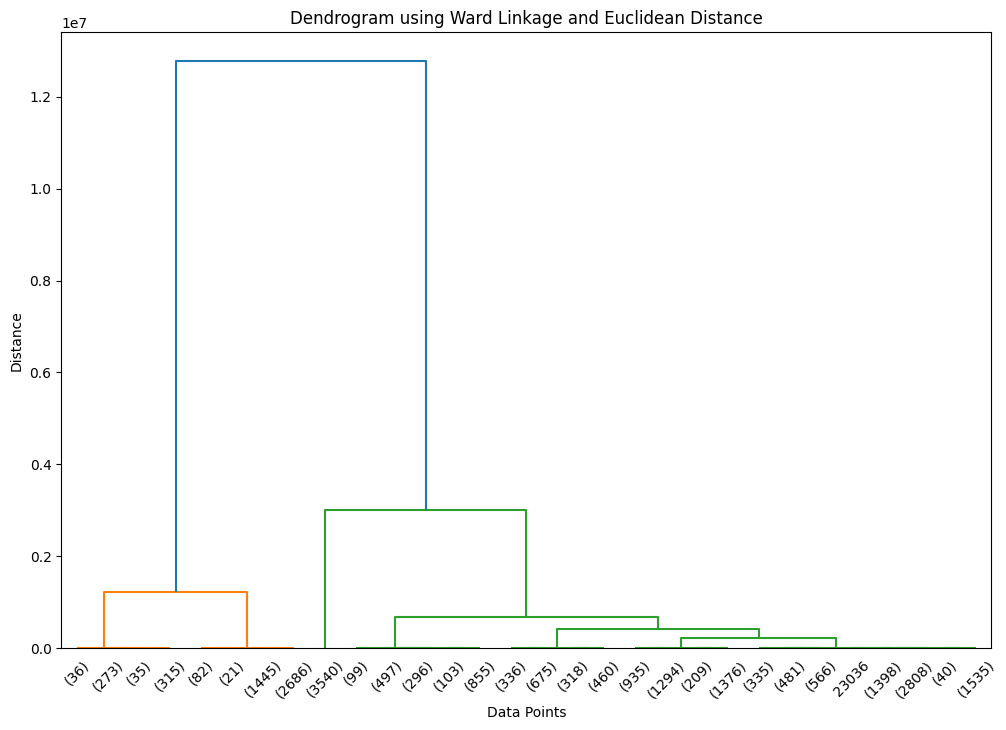

In [406]:
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram using Ward Linkage and Euclidean Distance')
plt.show()

# **Part 1 - Clustering: Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.**

In [407]:
from sklearn.cluster import KMeans

In [408]:
wss=[]

In [409]:
k_values = range(1, 11)


In [410]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)

    wss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [411]:
wss

[230500.0000000004,
 151233.99351993002,
 112310.00509998863,
 81309.30391453965,
 66929.28827316588,
 54045.6507674195,
 45282.440414558005,
 37467.27289905475,
 31625.372004209406,
 27562.433164414666]

In [412]:
a=[1,2,3,4,5,6,7,8,9,10]

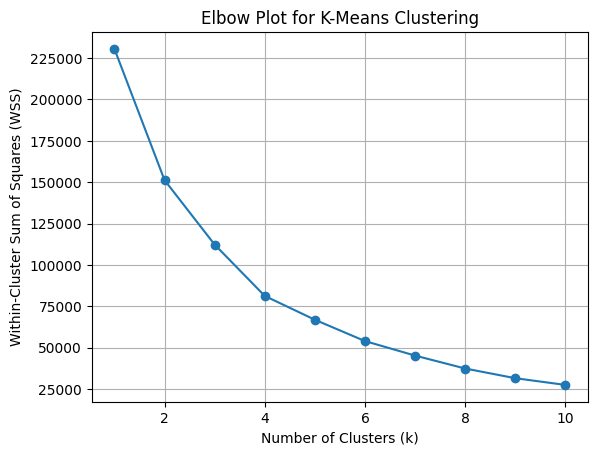

In [413]:
k_values = range(1, 11)

plt.plot(k_values, wss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Plot for K-Means Clustering')
plt.grid(True)
plt.show()

**the elbow point seems to be around k=4 or k=5. The optimal number of clusters can be chosen as 4 or 5**

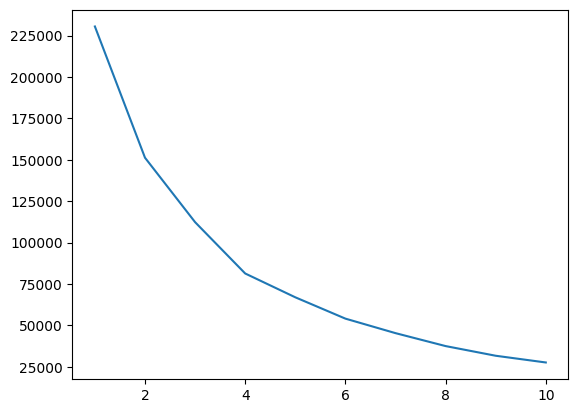

In [414]:
plt.plot(range(1,11), wss)

In [415]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df_scaled)
labels = k_means.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **Part 1 - Clustering: Print silhouette scores for up to 10 clusters and identify optimum number of clusters.**


In [416]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [417]:
silhouette_score(df_scaled,labels,random_state=1)

0.4035683879185429

# **KMeans with K=4**

In [418]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df_scaled)
labels = k_means.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [419]:
silhouette_score(df_scaled,labels,random_state=1)

0.4546830763313161

In [420]:
df["Clus_kmeans4"] = labels
df.head()


,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans4
0,300,250,75000,1806,325,323,1,0.0,0.35,0.0,0.003096,0.0,0.0,3
1,300,250,75000,1780,285,285,1,0.0,0.35,0.0,0.003509,0.0,0.0,3
2,300,250,75000,2727,356,355,1,0.0,0.35,0.0,0.002817,0.0,0.0,3
3,300,250,75000,2430,497,495,1,0.0,0.35,0.0,0.002020,0.0,0.0,3
4,300,250,75000,1218,242,242,1,0.0,0.35,0.0,0.004132,0.0,0.0,3


In [421]:
df.tail()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans4
23060,120,600,72000,4,4,4,1,0.14,0.35,0.0910,0.25,35.0,0.14,3
23061,720,300,216000,1,1,1,1,0.07,0.35,0.0455,1.00,70.0,0.07,3
23063,720,300,216000,2,1,1,1,0.05,0.35,0.0325,1.00,50.0,0.05,3
23064,120,600,72000,7,1,1,1,0.07,0.35,0.0455,1.00,70.0,0.07,3
23065,720,300,216000,2,2,2,1,0.09,0.35,0.0585,0.50,45.0,0.09,3


In [422]:
  df.Clus_kmeans4.value_counts().sort_index()

0     3712
1     3627
2     4705
3    11006
Name: Clus_kmeans4, dtype: int64

# **Part 1 - Clustering: Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in Clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots].**

In [423]:
kmeans = KMeans(n_clusters=4, random_state=1)
labels = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [424]:
df.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans4
0,300,250,75000,1806,325,323,1,0.0,0.35,0.0,0.003096,0.0,0.0,3
1,300,250,75000,1780,285,285,1,0.0,0.35,0.0,0.003509,0.0,0.0,3
2,300,250,75000,2727,356,355,1,0.0,0.35,0.0,0.002817,0.0,0.0,3
3,300,250,75000,2430,497,495,1,0.0,0.35,0.0,0.002020,0.0,0.0,3
4,300,250,75000,1218,242,242,1,0.0,0.35,0.0,0.004132,0.0,0.0,3


In [425]:
clust_profile = df.drop(['Clus_kmeans4'], axis=1)
clust_profile['Clus_kmeans4'] = df['Clus_kmeans4']
clust_profile = clust_profile.groupby('Clus_kmeans4').mean()
clust_profile['freq'] = df['Clus_kmeans4'].value_counts().sort_index()

In [426]:
clust_profile

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,freq
Clus_kmeans4,,,,,,,,,,,,,,
0,508.192888,182.809806,74138.340517,1.080058e+07,5.859628e+06,5.665794e+06,11425.136584,8974.129450,0.288276,6643.247260,0.002042,1.580635,0.839659,3712
1,562.114144,362.048525,176800.661704,3.003408e+05,1.694321e+05,1.431182e+05,18018.068927,1681.705106,0.349338,1095.479428,0.130382,12.530268,0.096441,3627
2,397.827843,166.769394,57468.471838,2.590218e+06,1.247003e+06,1.200861e+06,4609.133475,2149.398444,0.346417,1410.183559,0.004262,1.858206,0.506131,4705
3,279.508632,455.426131,94469.798292,2.479960e+05,1.490223e+05,1.305035e+05,10618.124841,1172.687113,0.341389,828.352912,0.130042,12.096411,0.174158,11006


<Figure size 1000x600 with 0 Axes>

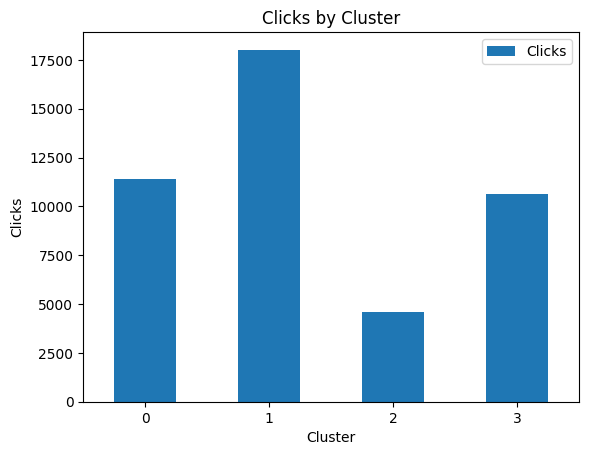

<Figure size 1000x600 with 0 Axes>

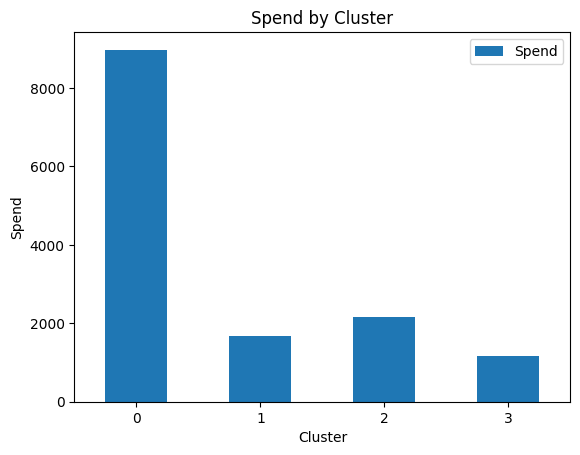

<Figure size 1000x600 with 0 Axes>

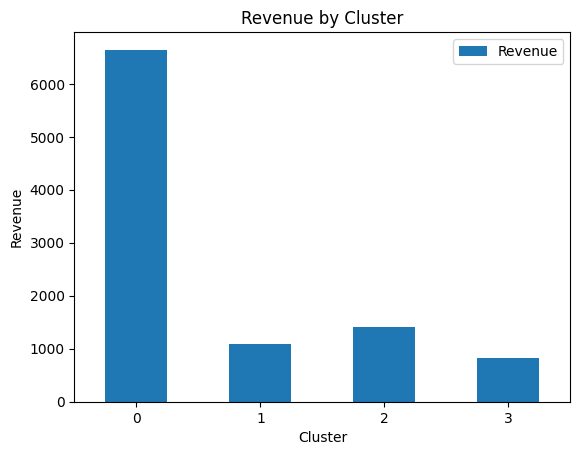

<Figure size 1000x600 with 0 Axes>

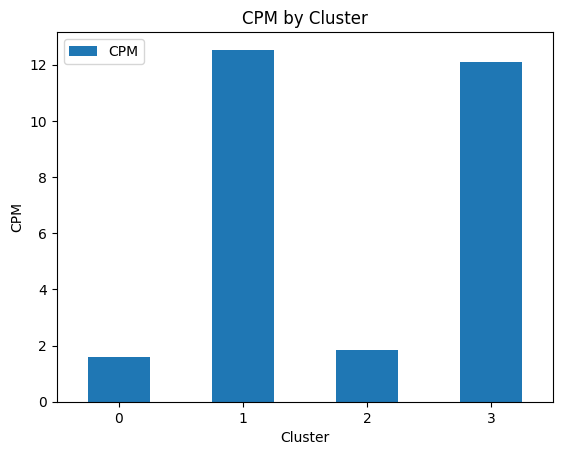

<Figure size 1000x600 with 0 Axes>

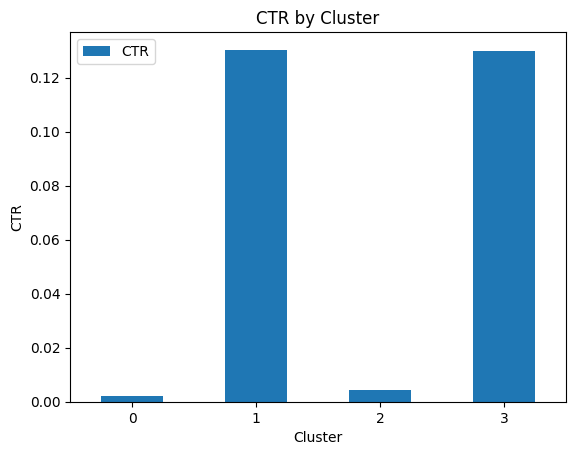

<Figure size 1000x600 with 0 Axes>

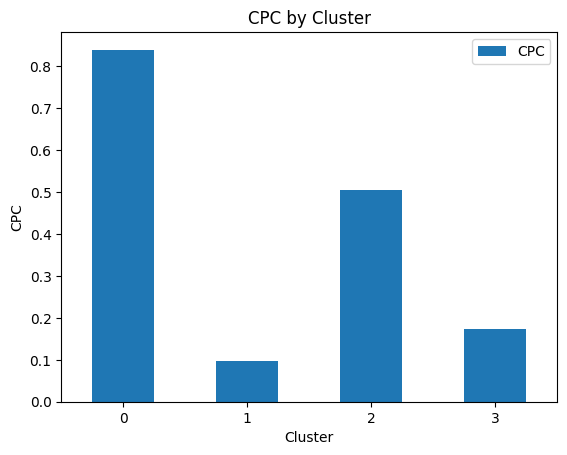

In [427]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the data in the 'clust_profile' DataFrame as you provided in the outcome.

# Group the data by clusters and take the mean (or sum) for each device type
cluster_summary = clust_profile.groupby('Clus_kmeans4').mean()  # You can use .sum() instead of .mean() if you want to sum the values.

# List of features you want to plot
features_to_plot = ['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC']

# Loop through each feature and create the bar plot
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    cluster_summary[[f'{feature}']].plot(kind='bar')
    plt.title(f'{feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'{feature}')
    plt.xticks(rotation=0)
    plt.show()



In [428]:
df_dropped_columns = df.drop(['Clus_kmeans4'], axis=1)

In [429]:
df.to_excel('Clustering Clean Ads_Data-02.xlsx', index=False)

In [430]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [431]:
from google.colab import drive
df= pd.read_excel('/content/drive/MyDrive/PCA India Data_Census.xlsx')

In [432]:
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [433]:
df.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [434]:
df.shape

(640, 61)

In [435]:
df.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [436]:
# Assuming you have loaded your dataset into a DataFrame named 'data'

# Step 1: Check for Non-Numeric Data
non_numeric_columns = data.select_dtypes(exclude=['number']).columns.tolist()
print(non_numeric_columns)

# Step 2: Inspect Rows with Non-Numeric Data
non_numeric_rows = data[data[non_numeric_columns].applymap(lambda x: isinstance(x, str))].index
print(data.loc[non_numeric_rows])

# Step 3: Handle Missing or Incorrect Data (if applicable)
# Based on the non-numeric rows, you may need to handle missing or incorrect data in those specific rows.

# Step 4: Convert Categorical Variables to Numeric
# If there are categorical columns that were not one-hot encoded properly, repeat the one-hot encoding process:
data_copy = pd.get_dummies(data, columns=categorical_columns)

# Step 5: Standardize the Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_copy)

# Step 6: Perform PCA
pca = PCA()
pca.fit(data_scaled)

# Continue with the rest of the code for interpreting the principal components and scree plot.


['Area Name']
     State Code  Dist.Code                Area Name  No_HH  TOT_M  TOT_F  \
0             1          1                  Kupwara   7707  23388  29796   
1             1          2                   Badgam   6218  19585  23102   
2             1          3              Leh(Ladakh)   4452   6546  10964   
3             1          4                   Kargil   1320   2784   4206   
4             1          5                    Punch  11654  20591  29981   
..          ...        ...                      ...    ...    ...    ...   
635          34        636                     Mahe   3333   8154  11781   
636          34        637                 Karaikal  10612  12346  21691   
637          35        638                 Nicobars   1275   1549   2630   
638          35        639  North  & Middle Andaman   3762   5200   8012   
639          35        640            South Andaman   7975  11977  18049   

     M_06  F_06  M_SC  F_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0

PCA()

In [437]:
df.duplicated().sum()

0

In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [439]:
# Calculate gender ratio for each state
df['Gender_Ratio'] = (df['TOT_F'] / df['TOT_M']) * 1000

# State with highest gender ratio
state_highest_ratio = df.loc[df['Gender_Ratio'].idxmax(), 'State']

# State with lowest gender ratio
state_lowest_ratio = df.loc[df['Gender_Ratio'].idxmin(), 'State']

print(state_highest_ratio)
print(state_lowest_ratio)

Andhra Pradesh
Lakshadweep


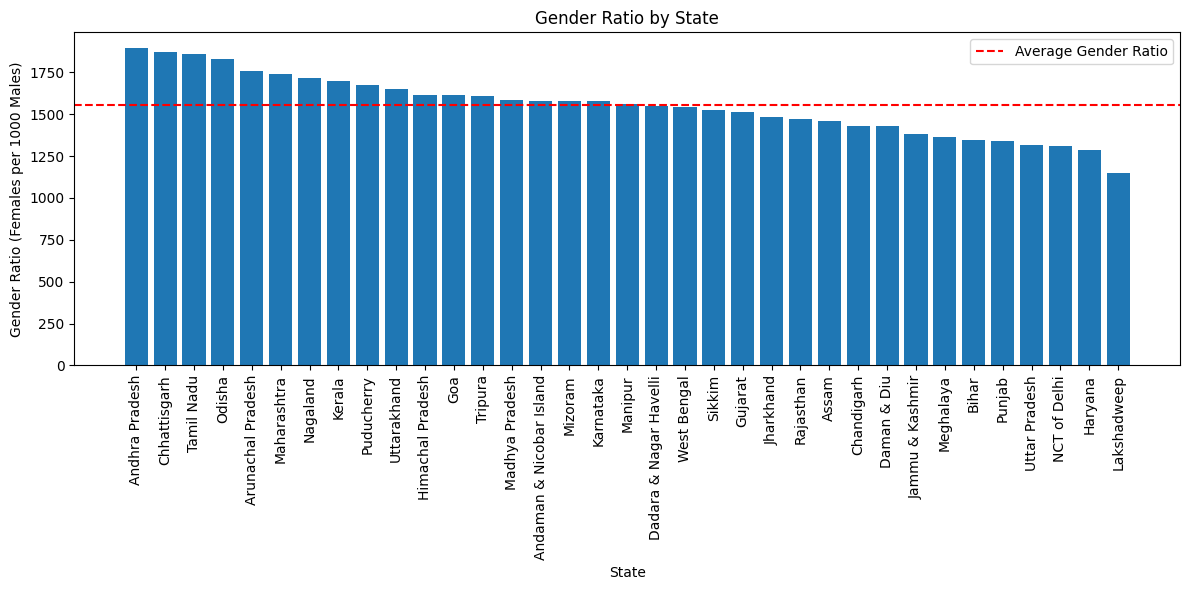

In [440]:
# Calculate gender ratio for each state
df['Gender_Ratio'] = (df['TOT_F'] / df['TOT_M']) * 1000

# Group data by state and calculate the mean gender ratio for each state
state_gender_ratio = df.groupby('State')['Gender_Ratio'].mean().reset_index()

# Sort the data in descending order by gender ratio
state_gender_ratio = state_gender_ratio.sort_values(by='Gender_Ratio', ascending=False)

# Plot the gender ratio for each state
plt.figure(figsize=(12, 6))
plt.bar(state_gender_ratio['State'], state_gender_ratio['Gender_Ratio'])
plt.xlabel('State')
plt.ylabel('Gender Ratio (Females per 1000 Males)')
plt.title('Gender Ratio by State')
plt.xticks(rotation=90)
plt.axhline(y=df['Gender_Ratio'].mean(), color='red', linestyle='--', label='Average Gender Ratio')
plt.legend()
plt.tight_layout()
plt.show()


In [441]:
# District with highest gender ratio
district_highest_ratio = df.loc[df['Gender_Ratio'].idxmax(), 'Area Name']

# District with lowest gender ratio
district_lowest_ratio = df.loc[df['Gender_Ratio'].idxmin(), 'Area Name']

print(district_highest_ratio)
print(district_lowest_ratio)

Krishna
Lakshadweep


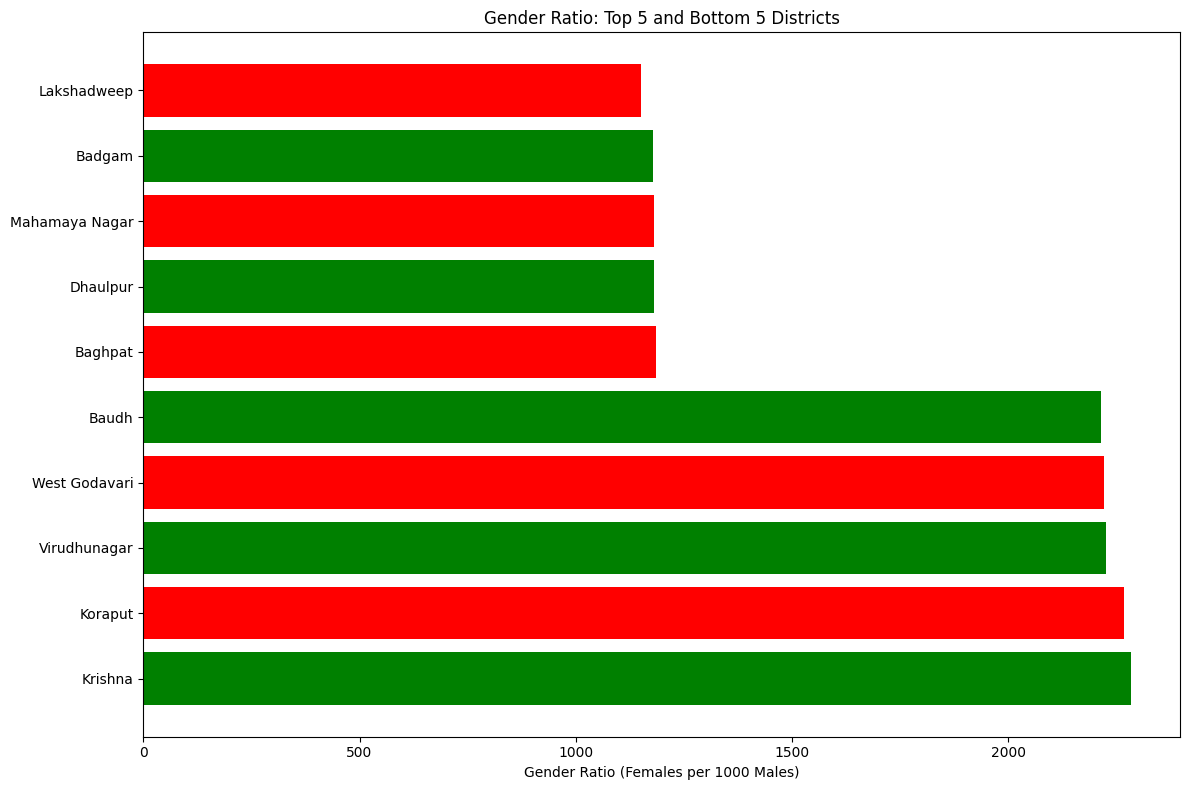

In [442]:
# Sort the data in descending order by gender ratio
df_sorted_by_gender_ratio = df.sort_values(by='Gender_Ratio', ascending=False)

# Get the top 5 districts with highest gender ratio
top_5_districts = df_sorted_by_gender_ratio.head(5)

# Get the bottom 5 districts with lowest gender ratio
bottom_5_districts = df_sorted_by_gender_ratio.tail(5)

# Concatenate the top and bottom districts
top_bottom_districts = pd.concat([top_5_districts, bottom_5_districts], axis=0)

# Plot the gender ratio for top and bottom districts
plt.figure(figsize=(12, 8))
plt.barh(top_bottom_districts['Area Name'], top_bottom_districts['Gender_Ratio'], color=['green', 'red'])
plt.xlabel('Gender Ratio (Females per 1000 Males)')
plt.title('Gender Ratio: Top 5 and Bottom 5 Districts')
plt.tight_layout()
plt.show()


In [443]:
# Calculate total male and female population in the dataset
total_male_population = df['TOT_M'].sum()
total_female_population = df['TOT_F'].sum()

# Calculate overall gender ratio in the dataset
overall_gender_ratio = (total_female_population / total_male_population) * 1000

print(overall_gender_ratio)


1530.7881133347312


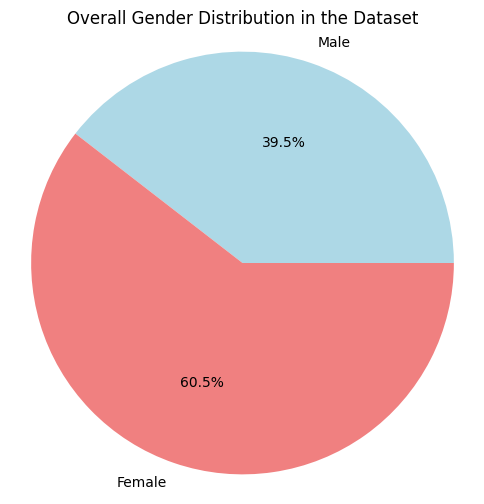

In [444]:
# Calculate total male and female population in the dataset
total_male_population = df['TOT_M'].sum()
total_female_population = df['TOT_F'].sum()

# Data for the pie chart
gender_labels = ['Male', 'Female']
gender_counts = [total_male_population, total_female_population]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Overall Gender Distribution in the Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()


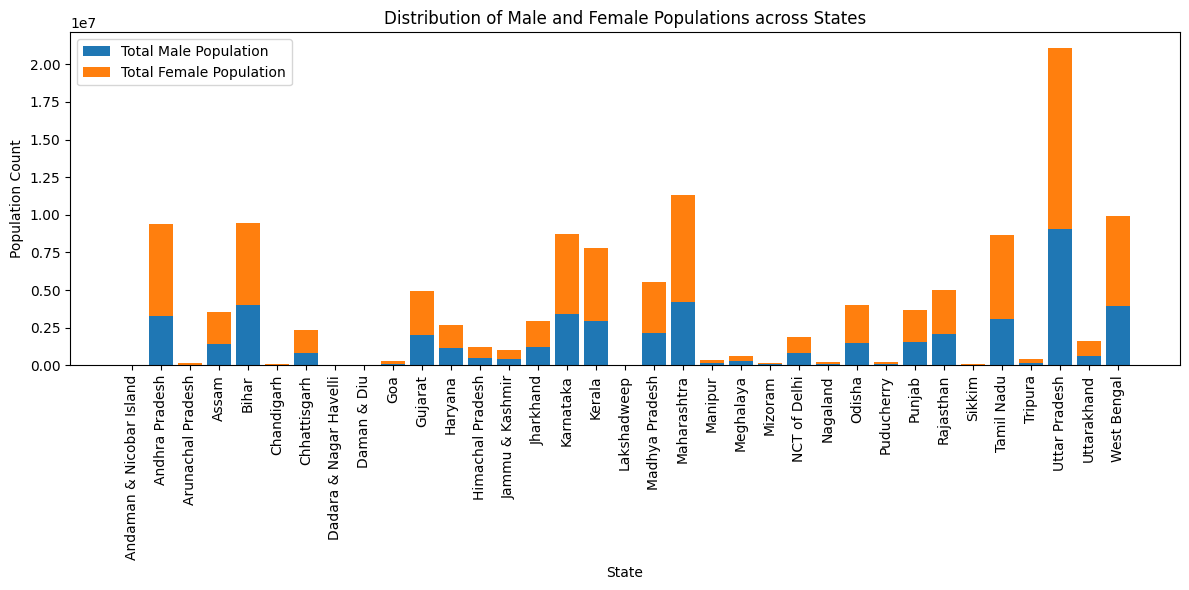

In [445]:
state_gender_distribution = df.groupby('State')[['TOT_M', 'TOT_F']].sum().reset_index()

# Plot the distribution using a stacked bar graph for states
plt.figure(figsize=(12, 6))
plt.bar(state_gender_distribution['State'], state_gender_distribution['TOT_M'], label='Total Male Population')
plt.bar(state_gender_distribution['State'], state_gender_distribution['TOT_F'], label='Total Female Population', bottom=state_gender_distribution['TOT_M'])
plt.xlabel('State')
plt.ylabel('Population Count')
plt.title('Distribution of Male and Female Populations across States')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [446]:
df['Child_Proportion'] = ((df['M_06'] + df['F_06']) / (df['TOT_M'] + df['TOT_F'])) * 100

# Sort districts by child population proportion
sorted_df = df.sort_values(by='Child_Proportion', ascending=False)

# Display the top 10 districts with the highest proportion of child population
top_10_child_population_districts = sorted_df[['Area Name', 'Child_Proportion']].head(10)
top_10_child_population_districts

,Area Name,Child_Proportion
0,Kupwara,22.672232
298,Jaintia Hills,21.709785
463,Jhabua,20.843557
183,Siddharthnagar,20.645677
464,Alirajpur,20.367223
86,Mewat,20.108675
216,Gopalganj,19.762458
227,Sheikhpura,19.346332
4,Punch,19.267579
1,Badgam,19.244735


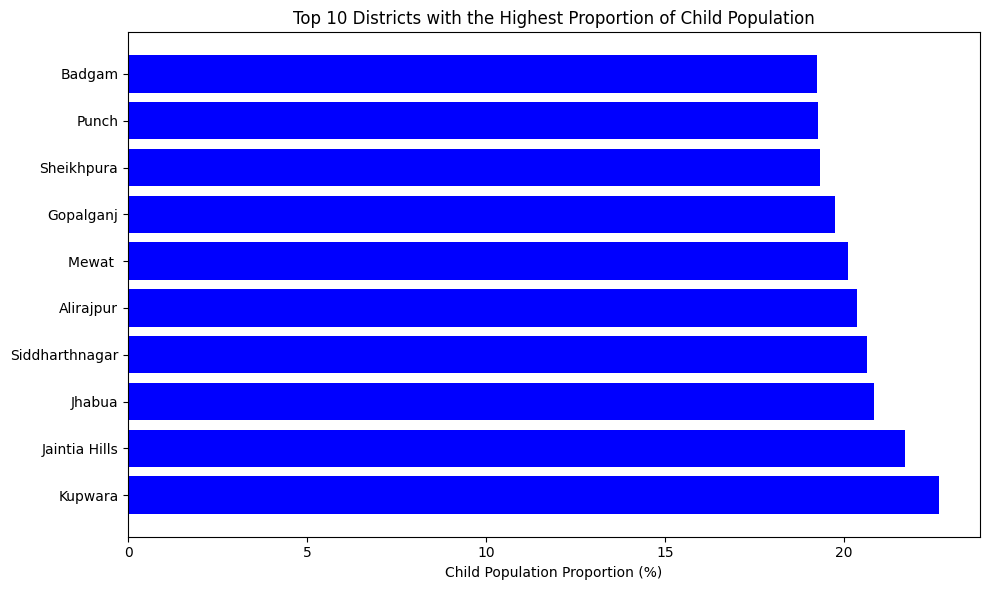

In [447]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_child_population_districts['Area Name'], top_10_child_population_districts['Child_Proportion'], color='blue')
plt.xlabel('Child Population Proportion (%)')
plt.title('Top 10 Districts with the Highest Proportion of Child Population')
plt.tight_layout()
plt.show()

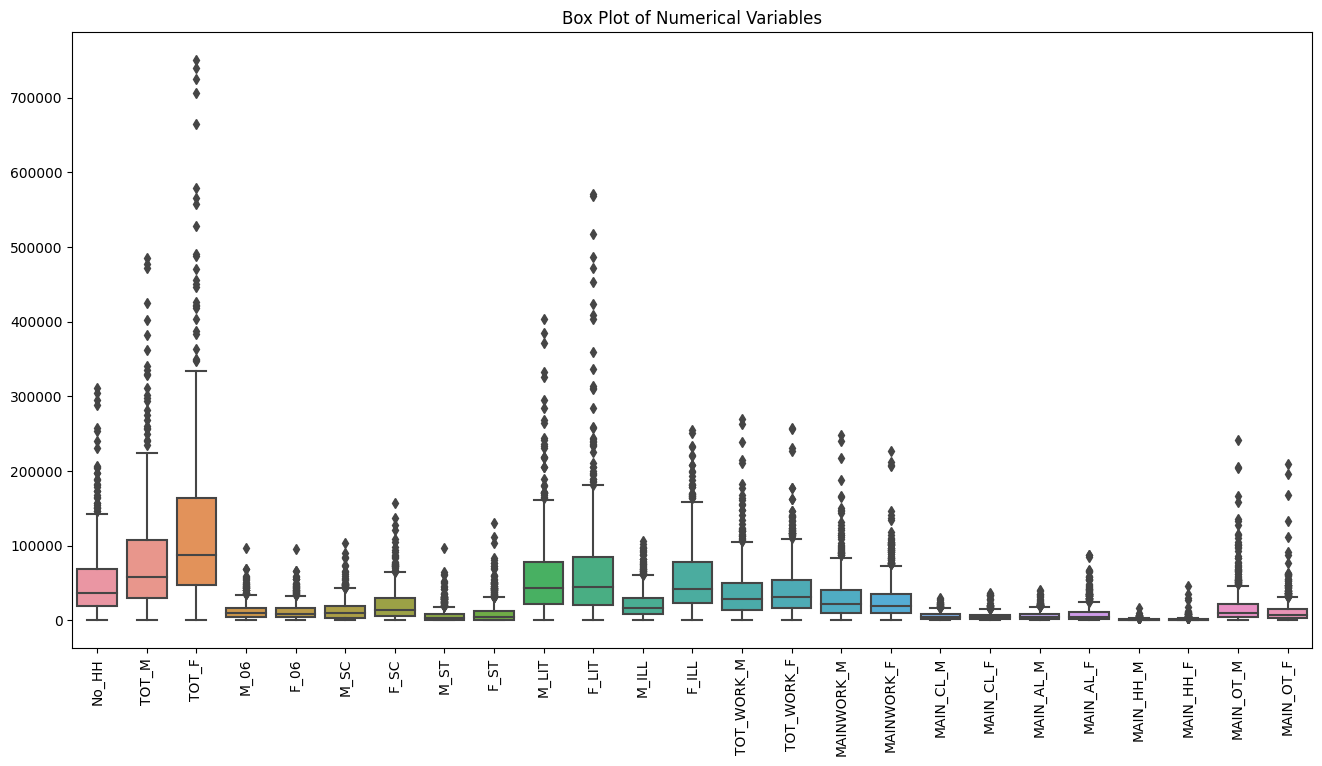

In [448]:
  # Select numerical variables for box plots
numerical_vars = ['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F']

# Create box plots for numerical variables
plt.figure(figsize=(16, 8))
sns.boxplot(data=df[numerical_vars])
plt.xticks(rotation=90)
plt.title('Box Plot of Numerical Variables')
plt.show()

In [449]:
from scipy import stats

# Select numerical variables for outlier detection
numerical_vars = ['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F']

# Calculate Z-scores for each numerical variable
z_scores = stats.zscore(df[numerical_vars])

# Create a DataFrame to store Z-scores
z_scores_df = pd.DataFrame(z_scores, columns=numerical_vars)

# Display the first few rows of the Z-scores DataFrame
print(z_scores_df.head())


      No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0 -0.904738 -0.771236 -0.815563 -0.561012 -0.507738 -0.958575 -0.957049   
1 -0.935695 -0.823100 -0.874534 -0.681096 -0.725367 -0.958297 -0.956772   
2 -0.972412 -1.000919 -0.981466 -0.976956 -0.965262 -0.958575 -0.956772   
3 -1.037530 -1.052224 -1.041001 -1.022118 -0.995393 -0.958783 -0.957049   
4 -0.822676 -0.809381 -0.813933 -0.622359 -0.649908 -0.957395 -0.955529   

       M_ST      F_ST     M_LIT  ...  MAINWORK_M  MAINWORK_F  MAIN_CL_M  \
0 -0.423306 -0.476423 -0.798097  ...   -0.872367   -0.898216  -1.042844   
1 -0.582014 -0.607607 -0.849434  ...   -0.813078   -0.882936  -0.913606   
2 -0.038951 -0.027273 -0.956457  ...   -0.898530   -0.843236  -1.035875   
3 -0.355965 -0.390060 -1.004643  ...   -0.944594   -0.927140  -1.138083   
4  0.149238  0.043330 -0.800568  ...   -0.879997   -0.865121  -0.988572   

   MAIN_CL_F  MAIN_AL_M  MAIN_AL_F  MAIN_HH_M  MAIN_HH_F  MAIN_OT_M  MAIN_OT_F  
0  -0.986630  -0.

In [450]:
# Select numerical features for outlier detection
numeric_features = ['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F']

# Calculate the first quartile (Q1), third quartile (Q3), and Interquartile Range (IQR)
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using the IQR method
outliers = ((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)

# Count the number of outliers
print("Number of outliers:", outliers.sum())


Number of outliers: 212


(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 [Text(-100000.0, 0, '−100000'),
  Text(0.0, 0, '0'),
  Text(100000.0, 0, '100000'),
  Text(200000.0, 0, '200000'),
  Text(300000.0, 0, '300000'),
  Text(400000.0, 0, '400000'),
  Text(500000.0, 0, '500000'),
  Text(600000.0, 0, '600000'),
  Text(700000.0, 0, '700000'),
  Text(800000.0, 0, '800000')])

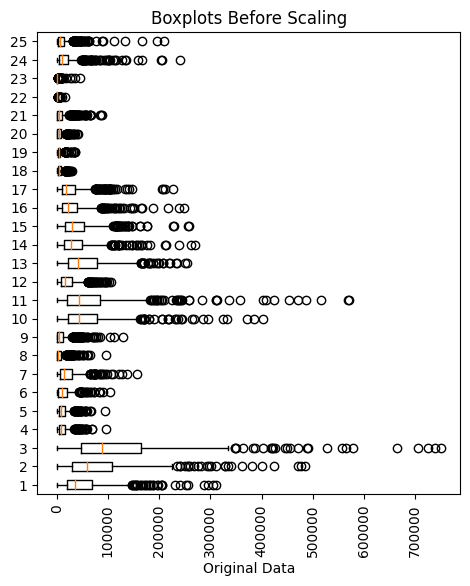

In [451]:
# Plot boxplots before scaling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_original_scaled.to_numpy(), vert=False)
plt.title('Boxplots Before Scaling')
plt.xlabel('Original Data')
plt.xticks(rotation=90)

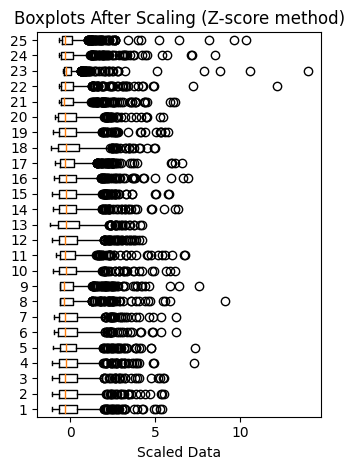

In [452]:
from sklearn.preprocessing import StandardScaler

numeric_features = ['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST',
                    'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F',
                    'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M',
                    'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F']


df_numeric = df[numeric_features]

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df_numeric)

df_original_scaled = pd.DataFrame(df_numeric, columns=numeric_features)
df_scaled = pd.DataFrame(scaled_data, columns=numeric_features)

plt.subplot(1, 2, 2)
plt.boxplot(df_scaled.to_numpy(), vert=False)
plt.title('Boxplots After Scaling (Z-score method)')
plt.xlabel('Scaled Data')

plt.tight_layout()
plt.show()


In [453]:
print("Number of outliers:", outliers.sum())

Number of outliers: 212


In [454]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select the numeric features for scaling
numeric_features = ['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST',
                    'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F',
                    'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M',
                    'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F']

# Create a DataFrame with selected numeric features
df_numeric = df[numeric_features]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data using the StandardScaler
scaled_data = scaler.fit_transform(df_numeric)

# Create DataFrames for original and scaled data
df_original_scaled = pd.DataFrame(df_numeric, columns=numeric_features)
df_scaled = pd.DataFrame(scaled_data, columns=numeric_features)

# Summary statistics for original data
original_stats = df_original_scaled.describe()

# Summary statistics for scaled data
scaled_stats = df_scaled.describe()

# Compare the summary statistics
comparison_stats = pd.concat([original_stats, scaled_stats], axis=1, keys=['Original Data', 'Scaled Data'])
print(comparison_stats)


       Original Data                                              \
               No_HH          TOT_M          TOT_F          M_06   
count     640.000000     640.000000     640.000000    640.000000   
mean    51222.871875   79940.576563  122372.084375  12309.098438   
std     48135.405475   73384.511114  113600.717282  11500.906881   
min       350.000000     391.000000     698.000000     56.000000   
25%     19484.000000   30228.000000   46517.750000   4733.750000   
50%     35837.000000   58339.000000   87724.500000   9159.000000   
75%     68892.000000  107918.500000  164251.750000  16520.250000   
max    310450.000000  485417.000000  750392.000000  96223.000000   

                                                                 \
               F_06           M_SC           F_SC          M_ST   
count    640.000000     640.000000     640.000000    640.000000   
mean   11942.300000   13820.946875   20778.392188   6191.807813   
std    11326.294567   14426.373130   21727.887713  

In [455]:
from sklearn.decomposition import PCA

In [456]:
from sklearn.preprocessing import StandardScaler

numeric_features = ['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT',
                    'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M', 'MAINWORK_F',
                    'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F',
                    'MAIN_OT_M', 'MAIN_OT_F']

df_numeric = df[numeric_features]


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)
covariance_matrix = np.cov(scaled_data, rowvar=False)

In [457]:
covariance_matrix

array([[ 1.00156495,  0.91760364,  0.97210871,  0.79880691,  0.79761892,
         0.77652237,  0.82513668,  0.14986147,  0.16536068,  0.93339679,
         0.92953895,  0.76423475,  0.86342292,  0.9396671 ,  0.92670732,
         0.92807872,  0.89270048,  0.43207719,  0.38327905,  0.67469178,
         0.5867724 ,  0.6423789 ,  0.49167632,  0.84508246,  0.82364336],
       [ 0.91760364,  1.00156495,  0.98417823,  0.95231299,  0.94927498,
         0.84123967,  0.82759238,  0.09156452,  0.08631495,  0.99086006,
         0.93316618,  0.91296522,  0.88674642,  0.9719359 ,  0.80915927,
         0.93429222,  0.74553319,  0.53256658,  0.35644439,  0.59434846,
         0.38034243,  0.7415124 ,  0.44420623,  0.8491783 ,  0.74640772],
       [ 0.97210871,  0.98417823,  1.00156495,  0.90939623,  0.90797548,
         0.81823775,  0.83405884,  0.123819  ,  0.12884754,  0.98698301,
         0.95850973,  0.85954194,  0.88830462,  0.970471  ,  0.87760417,
         0.94248852,  0.82410981,  0.48842044,  0

In [458]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
eigenvectors

array([[-2.38709793e-01,  1.62290697e-02, -8.76647456e-02,
         1.18008259e-01, -8.76388277e-02, -6.21462065e-02,
         6.79659636e-02,  6.43699653e-02, -7.64918910e-03,
         1.42143998e-01,  4.68119251e-01, -3.26275798e-01,
         4.95961590e-02, -4.14820126e-01, -2.96419040e-02,
        -7.89959648e-02,  2.07197943e-01,  4.54316275e-01,
        -3.12838099e-01, -3.99463042e-02,  1.56622125e-01,
        -1.54132763e-13, -1.89870982e-13,  4.40407143e-14,
        -1.20806462e-13],
       [-2.41900082e-01, -9.40391173e-02, -1.33624380e-02,
        -1.32280714e-01, -3.11677026e-02, -3.14874634e-02,
         8.71613874e-02, -1.01066088e-02, -6.93858859e-03,
         3.87168511e-02, -4.94496518e-02,  3.07176442e-02,
         5.95675463e-02,  1.38190960e-01,  4.30457789e-02,
        -3.17408168e-02, -4.10847222e-01,  9.04784530e-02,
        -1.05775343e-01, -2.00916820e-01,  2.03781233e-01,
        -5.36276726e-01, -2.66850810e-02, -1.11373613e-01,
        -3.12901851e-01],
    

In [459]:
eigenvalues

array([ 1.62107515e+01,  2.42307151e+00,  2.00578300e+00,  1.34445040e+00,
        8.20116560e-01,  7.20513809e-01,  5.05666322e-01,  3.07288778e-01,
        3.01513233e-01,  1.66973671e-01,  7.47965844e-02,  6.11833157e-02,
        4.73587939e-02,  1.62702744e-02,  1.09624342e-02,  9.37136341e-03,
        6.91859593e-03,  3.02374971e-03,  1.58187256e-03,  9.34086028e-04,
        5.93806200e-04,  8.56067689e-16,  7.16390606e-16, -4.00927269e-17,
       -3.36329772e-16])

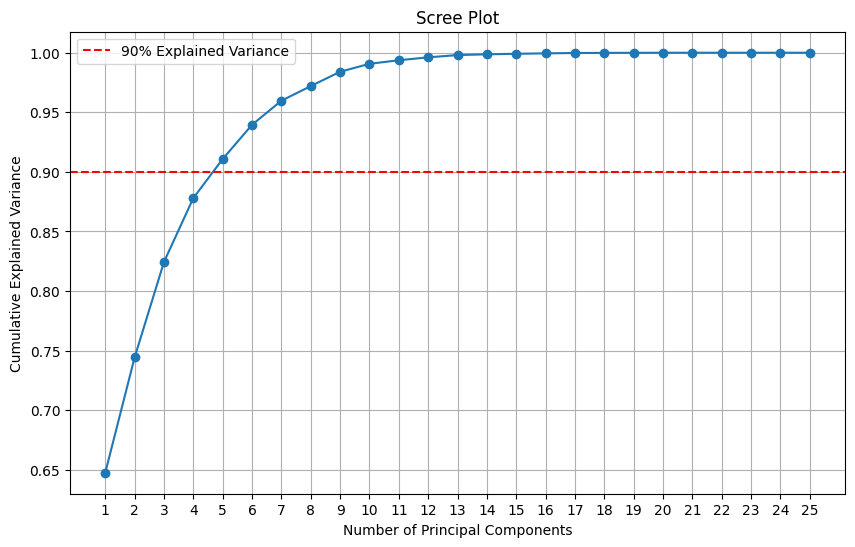

In [460]:

eigenvalues = np.array([1.62107515e+01, 2.42307151e+00, 2.00578300e+00, 1.34445040e+00,
                        8.20116560e-01, 7.20513809e-01, 5.05666322e-01, 3.07288778e-01,
                        3.01513233e-01, 1.66973671e-01, 7.47965844e-02, 6.11833157e-02,
                        4.73587939e-02, 1.62702744e-02, 1.09624342e-02, 9.37136341e-03,
                        6.91859593e-03, 3.02374971e-03, 1.58187256e-03, 9.34086028e-04,
                        5.93806200e-04, 8.56067689e-16, 7.16390606e-16, -4.00927269e-17,
                        -3.36329772e-16])

# Calculate the total variance
total_variance = np.sum(eigenvalues)

# Calculate the explained variance ratio by each PC
explained_variance_ratio = eigenvalues / total_variance

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(eigenvalues) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.xticks(np.arange(1, len(eigenvalues) + 1))
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Explained Variance')
plt.legend()
plt.show()


In [461]:
from sklearn.decomposition import PCA

In [462]:
pca = PCA(n_components=len(eigenvalues))


In [463]:
df.drop(['Gender_Ratio','Child_Proportion'], axis=1, inplace=True)


In [467]:
pca.fit(data_scaled)

explained_variance_ratios = pca.explained_variance_ratio_

cumulative_explained_variance = np.cumsum(explained_variance_ratios)

n_components_90_percent = np.argmax(cumulative_explained_variance >= 0.9) + 1

print("Number of principal components for at least 90% explained variance:", n_components_90_percent)

pc_vs_columns = pd.DataFrame({
    'Principal Component': range(1, len(explained_variance_ratios) + 1),
    'Explained Variance Ratio': explained_variance_ratios,
    'Cumulative Explained Variance': cumulative_explained_variance
})

print("\nComparison of PCs with Actual Columns:")
print(pc_vs_columns)

loadings = pca.components_.T

num_pcs = len(explained_variance_ratios)
for pc_num, loading_vector in enumerate(loadings, 1):
    if pc_num > num_pcs:
        break


    top_3_loadings_indices = np.argsort(np.abs(loading_vector))[::-1][:3]
    top_3_loadings = loading_vector[top_3_loadings_indices]
    top_3_feature_names = data_copy.columns[top_3_loadings_indices]

    print(f"\nInferences about Principal Component {pc_num}:")
    print(f"Explained Variance Ratio: {explained_variance_ratios[pc_num - 1]:.4f}")
    print(f"Cumulative Explained Variance: {cumulative_explained_variance[pc_num - 1]:.4f}")
    print("Top 3 Loadings:")
    for i in range(3):
        print(f"{top_3_feature_names[i]}: {top_3_loadings[i]:.4f}")


Number of principal components for at least 90% explained variance: 1

Comparison of PCs with Actual Columns:
    Principal Component  Explained Variance Ratio  \
0                     1                  0.047286   
1                     2                  0.013212   
2                     3                  0.007963   
3                     4                  0.006951   
4                     5                  0.004707   
5                     6                  0.004258   
6                     7                  0.003420   
7                     8                  0.002715   
8                     9                  0.002468   
9                    10                  0.002310   
10                   11                  0.002098   
11                   12                  0.001979   
12                   13                  0.001785   
13                   14                  0.001700   
14                   15                  0.001634   
15                   16                  0

In [471]:

loadings_pc1 = pca.components_[0]


In [472]:
X_std = data_scaled

In [473]:
PC1 = sum(loadings_pc1[i] * X_std[:, i] for i in range(len(loadings_pc1)))


In [475]:
PC1

array([-4.79320724e+00, -4.94952414e+00, -6.15781990e+00, -6.47819733e+00,
       -4.65292360e+00, -3.48306867e+00, -5.20092053e+00, -4.78314858e+00,
       -5.36899576e+00, -4.39148368e+00, -5.96948747e+00, -5.54384667e+00,
       -6.31361877e+00, -4.07926881e+00, -5.95799506e+00, -5.53085783e+00,
       -6.22392323e+00, -6.16130727e+00, -4.63432927e+00, -5.83829035e+00,
       -1.17062106e+00, -5.77425113e+00, -1.41771932e+00,  1.03392002e+01,
       -6.64640984e+00, -4.14882012e+00,  3.61117556e+00, -6.68141374e-01,
       -2.95810681e+00, -2.79596683e+00, -3.48418576e+00, -4.02342992e+00,
       -2.22230337e+00, -6.34607430e+00,  2.53967955e+00, -3.57098257e+00,
        2.29417066e+00,  9.49163891e-01, -3.86782086e+00, -5.14075656e+00,
        4.51966767e+00, -3.22274467e+00, -1.74414075e-01, -3.79985878e+00,
       -4.91216831e+00, -2.40161153e+00, -3.90057825e+00, -1.06768311e+00,
        2.44879337e+00, -1.29605523e+00, -3.90081508e+00, -4.23538350e+00,
       -2.17474054e+00, -